In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scrublet as scr
import celltypist
from celltypist import models
import decoupler as dc
import matplotlib.pyplot as plt
import seaborn as sns
sc.set_figure_params(dpi=150)

# Import raw files

In [2]:
inpath="/home/lugli/spuccio/Projects/SP039/FileH5AD_input/"

In [3]:
Ovarian_2 = sc.read(inpath+"Ovarian_2.h5ad")
Melan_3 = sc.read(inpath+"Melan_3.h5ad")
Lung_3 = sc.read(inpath+"Lung_3.h5ad")
Lung_1 = sc.read(inpath+"Lung_1.h5ad")
Renal_Cell = sc.read(inpath+"Renal_Cell.h5ad")
Ovarian_1 = sc.read(inpath+"Ovarian_1.h5ad")
Breast_2 = sc.read(inpath+"Breast_2.h5ad")
Lung_2 = sc.read(inpath+"Lung_2.h5ad")
Colorectal = sc.read(inpath+"Colorectal.h5ad")
Melan_2 = sc.read(inpath+"Melan_2.h5ad")
Melan_1 = sc.read(inpath+"Melan_1.h5ad")

# Read Metadata

In [4]:
metadata = pd.read_excel('Metadata2.xlsx')

In [5]:
metadata['Sample'] =   [ 'Patient' + str(col) for col in metadata.Sample]

In [6]:
metadata.head(50)

SampleID       GEO_RNA           Cohort          Type  \
0              PJ048    GSM2940098        GSE103224  PrimaryTumor   
1              PJ030    GSM2758475        GSE103224  PrimaryTumor   
2              PJ025    GSM2758474        GSE103224  PrimaryTumor   
3              PJ018    GSM2758473        GSE103224  PrimaryTumor   
4              PJ017    GSM2758472        GSE103224  PrimaryTumor   
5              PJ016    GSM2758472        GSE103224  PrimaryTumor   
6             MGH102  NotAvailable        GSE131928  PrimaryTumor   
7             MGH105  NotAvailable        GSE131928  PrimaryTumor   
8             MGH115  NotAvailable        GSE131928  PrimaryTumor   
9             MGH124  NotAvailable        GSE131928  PrimaryTumor   
10            MGH125  NotAvailable        GSE131928  PrimaryTumor   
11            MGH126  NotAvailable        GSE131928  PrimaryTumor   
12               ND1  NotAvailable        GSE163120  PrimaryTumor   
13               ND2  NotAvailable        GSE163120  PrimaryTumor   
14               ND3  NotAvailable        GSE163120  PrimaryTumor   
15               ND4  NotAvailable        GSE163120  PrimaryTumor   
16               ND5  NotAvailable        GSE163120  PrimaryTumor   
17               ND6  NotAvailable        GSE163120  PrimaryTumor   
18              NS02    GSM3827162        GSE131907    Metastasis   
19              NS03    GSM3827163        GSE131907    Metastasis   
20              NS04    GSM3827164        GSE131907    Metastasis   
21              NS06    GSM3827165        GSE131907    Metastasis   
22              NS07    GSM3827166        GSE131907    Metastasis   
23              NS12    GSM3827167        GSE131907    Metastasis   
24              NS13    GSM3827168        GSE131907    Metastasis   
25              NS16    GSM3827169        GSE131907    Metastasis   
26              NS17    GSM3827170        GSE131907    Metastasis   
27              NS19    GSM3827171        GSE131907    Metastasis   
28           GLIO1_T  NotAvailable  InternalCohort2  PrimaryTumor   
29           GLIO2_T  NotAvailable  InternalCohort2  PrimaryTumor   
30           GLIO3_T  NotAvailable  InternalCohort2  PrimaryTumor   
31           GLIO4_T  NotAvailable  InternalCohort2  PrimaryTumor   
32           GLIO5_T  NotAvailable  InternalCohort2  PrimaryTumor   
33           GLIO6_T  NotAvailable  InternalCohort2  PrimaryTumor   
34           GLIO7_T  NotAvailable  InternalCohort2  PrimaryTumor   
35         Ovarian_2    GSM5645898        GSE186344    Metastasis   
36          Breast_2    GSM5645892        GSE186344    Metastasis   
37           Melan_3    GSM5645890        GSE186344    Metastasis   
38            Lung_1    GSM5645894        GSE186344    Metastasis   
39            Lung_2    GSM5645895        GSE186344    Metastasis   
40            Lung_3    GSM5645896        GSE186344    Metastasis   
41        Renal_Cell    GSM5645902        GSE186344    Metastasis   
42         Ovarian_1    GSM5645897        GSE186344    Metastasis   
43        Colorectal    GSM5645900        GSE186344    Metastasis   
44           Melan_2    GSM5645889        GSE186344    Metastasis   
45           Melan_1    GSM5645888        GSE186344    Metastasis   
46  KSO07_BRM112_GEX  NotAvailable  InternalCohort1    Metastasis   
47  KSO07_BRM125_GEX  NotAvailable  InternalCohort1    Metastasis   
48  KSO07_BrM138_GEX  NotAvailable  InternalCohort1    Metastasis   
49  KSO07_BRM139_GEX  NotAvailable  InternalCohort1    Metastasis   

         Subtype               Diagnosis         Grade              Location  \
0      Proneural            Glioblastoma            IV        Right_Parietal   
1      Classical  Anaplastic_Astrocytoma           III         Left_Temporal   
2      Classical            Glioblastoma            IV         Right_Frontal   
3      Proneural            Glioblastoma            IV         Left_Temporal   
4    Mesenchymal            Glioblastoma            IV         Left_Temporal   
5      Prone

# Fix Metadata 

In [7]:
tmp1 = metadata.loc[metadata['SampleID'] == "Ovarian_2"].loc[metadata.loc[metadata['SampleID'] == "Ovarian_2"].index.repeat(Ovarian_2.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Ovarian_2-" + tmp1.index.astype(str),inplace=True) 
Ovarian_2.obs = tmp1


In [8]:
tmp1 = metadata.loc[metadata['SampleID'] == "Melan_3"].loc[metadata.loc[metadata['SampleID'] == "Melan_3"].index.repeat(Melan_3.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Melan_3-" + tmp1.index.astype(str),inplace=True) 
Melan_3.obs = tmp1


In [9]:
tmp1 = metadata.loc[metadata['SampleID'] == "Lung_3"].loc[metadata.loc[metadata['SampleID'] == "Lung_3"].index.repeat(Lung_3.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Lung_3-" + tmp1.index.astype(str),inplace=True) 
Lung_3.obs = tmp1

In [10]:
tmp1 = metadata.loc[metadata['SampleID'] == "Lung_1"].loc[metadata.loc[metadata['SampleID'] == "Lung_1"].index.repeat(Lung_1.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Lung_1-" + tmp1.index.astype(str),inplace=True) 
Lung_1.obs = tmp1

In [11]:
tmp1 = metadata.loc[metadata['SampleID'] == "Renal_Cell"].loc[metadata.loc[metadata['SampleID'] == "Renal_Cell"].index.repeat(Renal_Cell.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Renal_Cell-" + tmp1.index.astype(str),inplace=True) 
Renal_Cell.obs = tmp1

In [12]:
tmp1 = metadata.loc[metadata['SampleID'] == "Ovarian_1"].loc[metadata.loc[metadata['SampleID'] == "Ovarian_1"].index.repeat(Ovarian_1.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Ovarian_1-" + tmp1.index.astype(str),inplace=True) 
Ovarian_1.obs = tmp1

In [13]:
tmp1 = metadata.loc[metadata['SampleID'] == "Breast_2"].loc[metadata.loc[metadata['SampleID'] == "Breast_2"].index.repeat(Breast_2.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Breast_2-" + tmp1.index.astype(str),inplace=True) 
Breast_2.obs = tmp1

In [14]:
tmp1 = metadata.loc[metadata['SampleID'] == "Lung_2"].loc[metadata.loc[metadata['SampleID'] == "Lung_2"].index.repeat(Lung_2.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Lung_2-" + tmp1.index.astype(str),inplace=True) 
Lung_2.obs = tmp1

In [15]:
tmp1 = metadata.loc[metadata['SampleID'] == "Colorectal"].loc[metadata.loc[metadata['SampleID'] == "Colorectal"].index.repeat(Colorectal.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Colorectal-" + tmp1.index.astype(str),inplace=True) 
Colorectal.obs = tmp1

In [16]:
tmp1 = metadata.loc[metadata['SampleID'] == "Melan_2"].loc[metadata.loc[metadata['SampleID'] == "Melan_2"].index.repeat(Melan_2.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Melan_2-" + tmp1.index.astype(str),inplace=True) 
Melan_2.obs = tmp1

In [17]:
tmp1 = metadata.loc[metadata['SampleID'] == "Melan_1"].loc[metadata.loc[metadata['SampleID'] == "Melan_1"].index.repeat(Melan_1.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "Melan_1-" + tmp1.index.astype(str),inplace=True) 
Melan_1.obs = tmp1

# Concatenate 

In [18]:
Ovarian_2.var_names_make_unique()
Melan_3.var_names_make_unique()
Lung_3.var_names_make_unique()
Lung_1.var_names_make_unique()
Renal_Cell.var_names_make_unique()
Ovarian_1.var_names_make_unique()
Breast_2.var_names_make_unique()
Lung_2.var_names_make_unique()
Colorectal.var_names_make_unique()
Melan_2.var_names_make_unique()
Melan_1.var_names_make_unique()

In [19]:
adata = Ovarian_2.concatenate(Melan_3,Lung_3,Lung_1,Renal_Cell,Ovarian_1,Breast_2,Lung_2,Colorectal,Melan_2,Melan_1,
                         index_unique=None)

In [20]:
del(Ovarian_2,Melan_3,Lung_3,Lung_1,Renal_Cell,Ovarian_1,Breast_2,Lung_2,Colorectal,Melan_2,Melan_1)

In [21]:
print(adata.obs['SampleID'].value_counts())
adata

Breast_2      12003
Lung_1         9985
Melan_2        9800
Ovarian_2      7711
Lung_3         7337
Ovarian_1      5675
Lung_2         3891
Melan_3        3886
Colorectal     2549
Melan_1        2228
Renal_Cell     1539
Name: SampleID, dtype: int64


AnnData object with n_obs × n_vars = 66604 × 33694
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch'
    var: 'ENSGeneID', 'GeneTemp-7', 'GeneTempClean-7'

In [22]:
adata.layers['raw'] = adata.X 

# Calculate QC

In [23]:
# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))

In [24]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [25]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mt2'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [26]:
adata

AnnData object with n_obs × n_vars = 66604 × 33694
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts'
    var: 'ENSGeneID', 'GeneTemp-7', 'GeneTempClean-7', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'raw'

# Plot QC

... storing 'SampleID' as categorical
... storing 'GEO_RNA' as categorical
... storing 'Cohort' as categorical
... storing 'Type' as categorical
... storing 'Subtype' as categorical
... storing 'Diagnosis' as categorical
... storing 'Grade' as categorical
... storing 'Location' as categorical
... storing 'IDH1_Status' as categorical
... storing 'EGFR_Status' as categorical
... storing 'MGMT' as categorical
... storing 'Sample' as categorical
... storing 'Sex' as categorical
... storing 'Age' as categorical
... storing 'Sorted' as categorical
... storing 'MET' as categorical


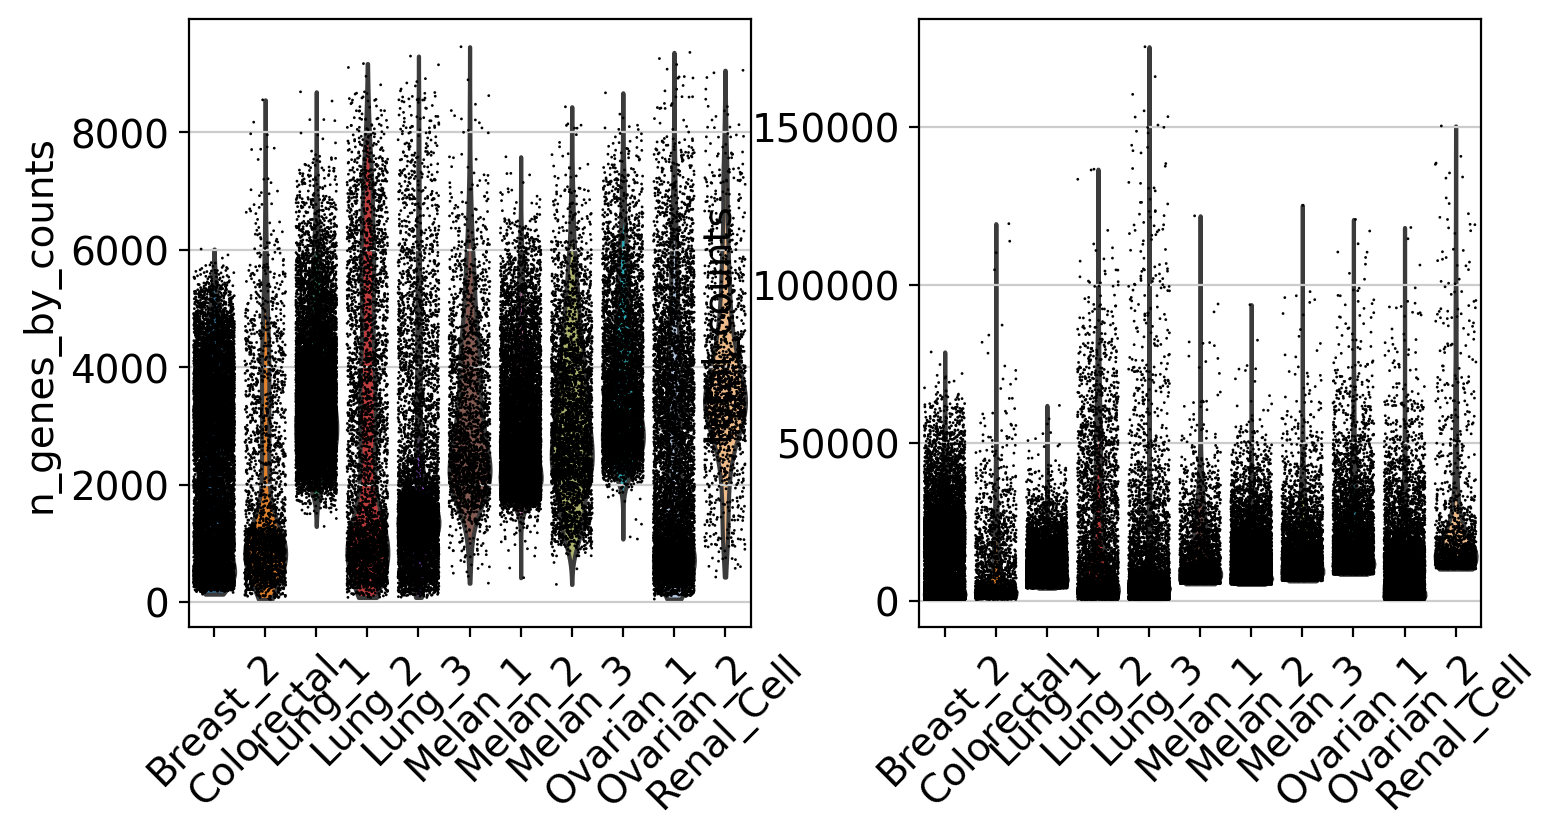

In [27]:
sc.set_figure_params(dpi=100)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

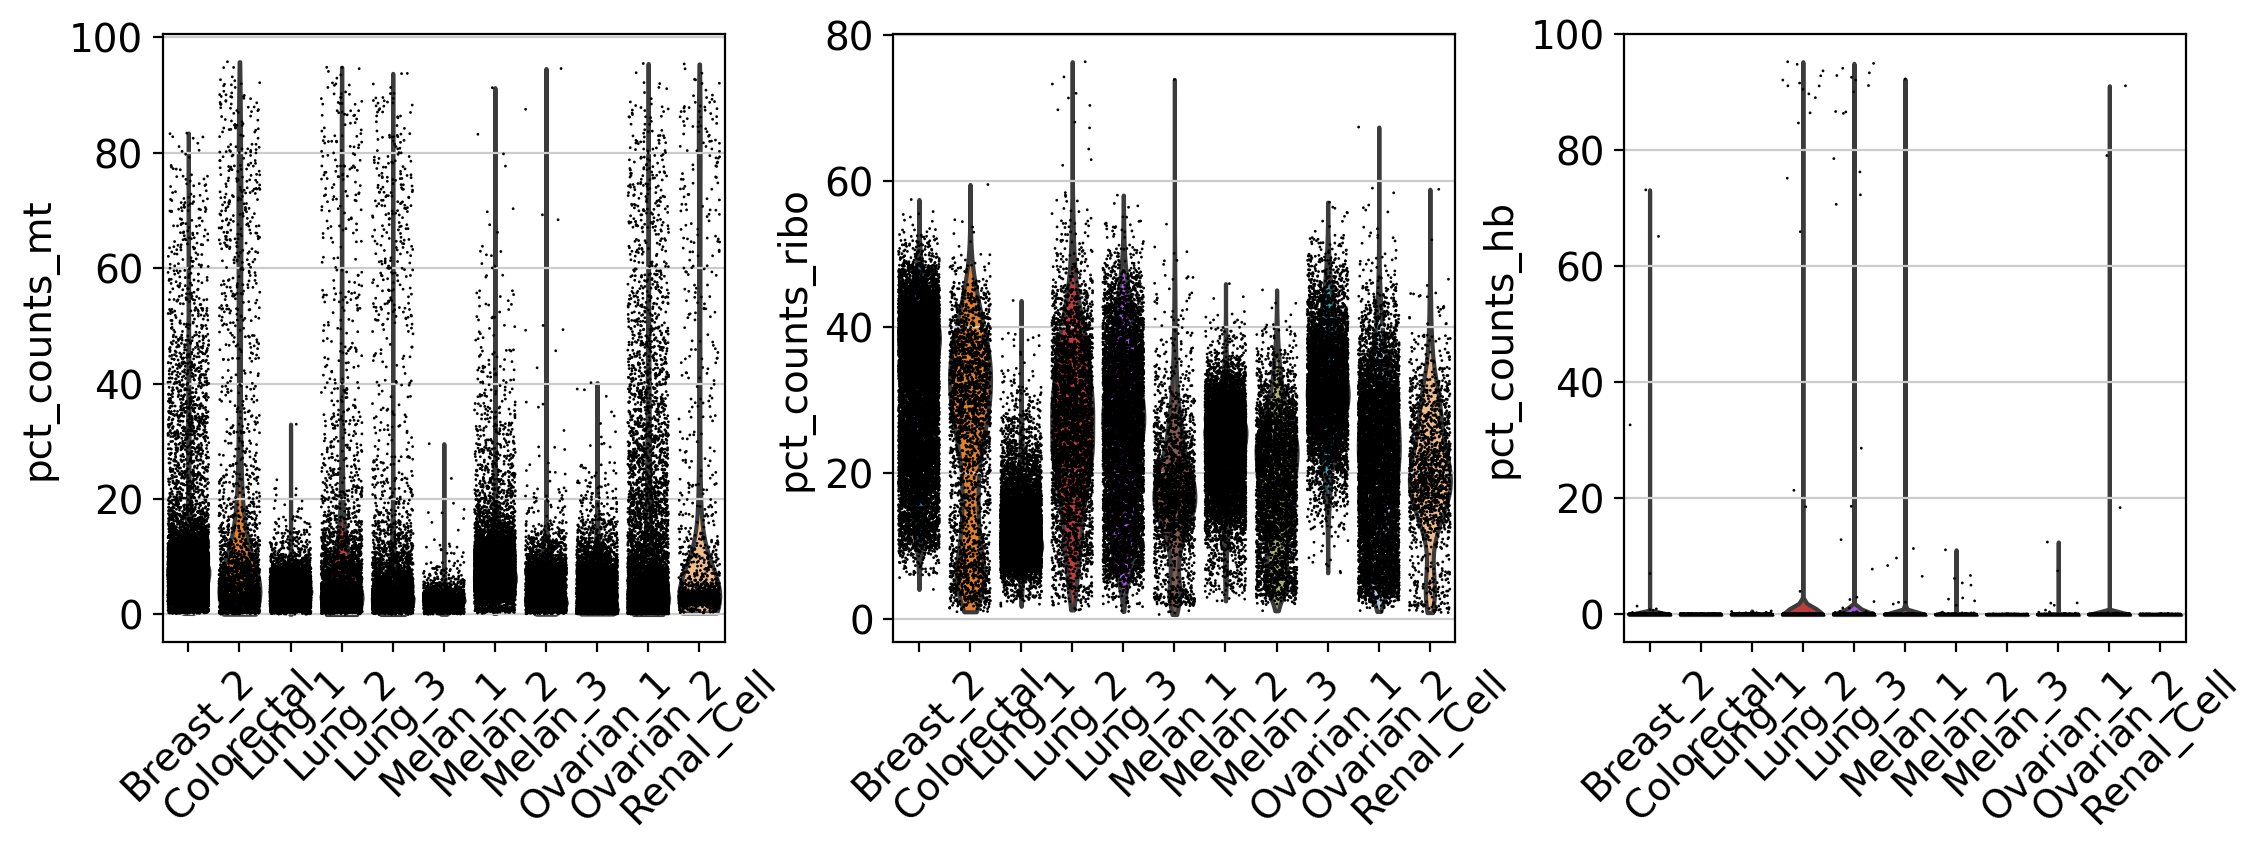

In [28]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

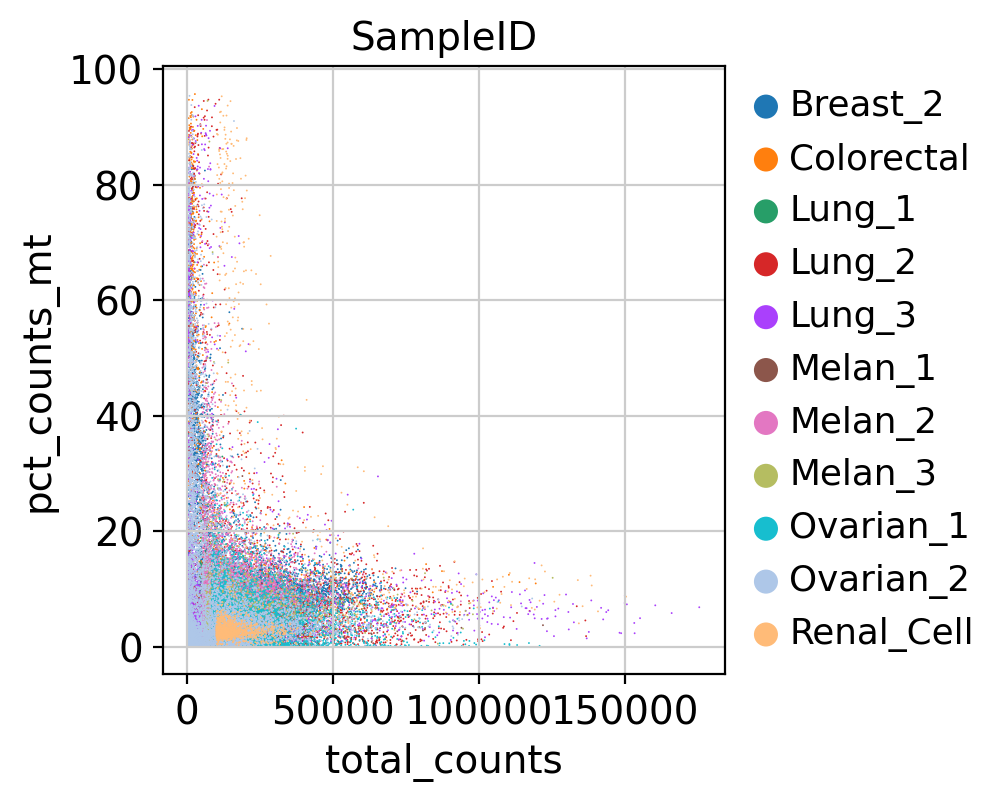

In [29]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="SampleID")

# Filtering

In [30]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

66307 28023


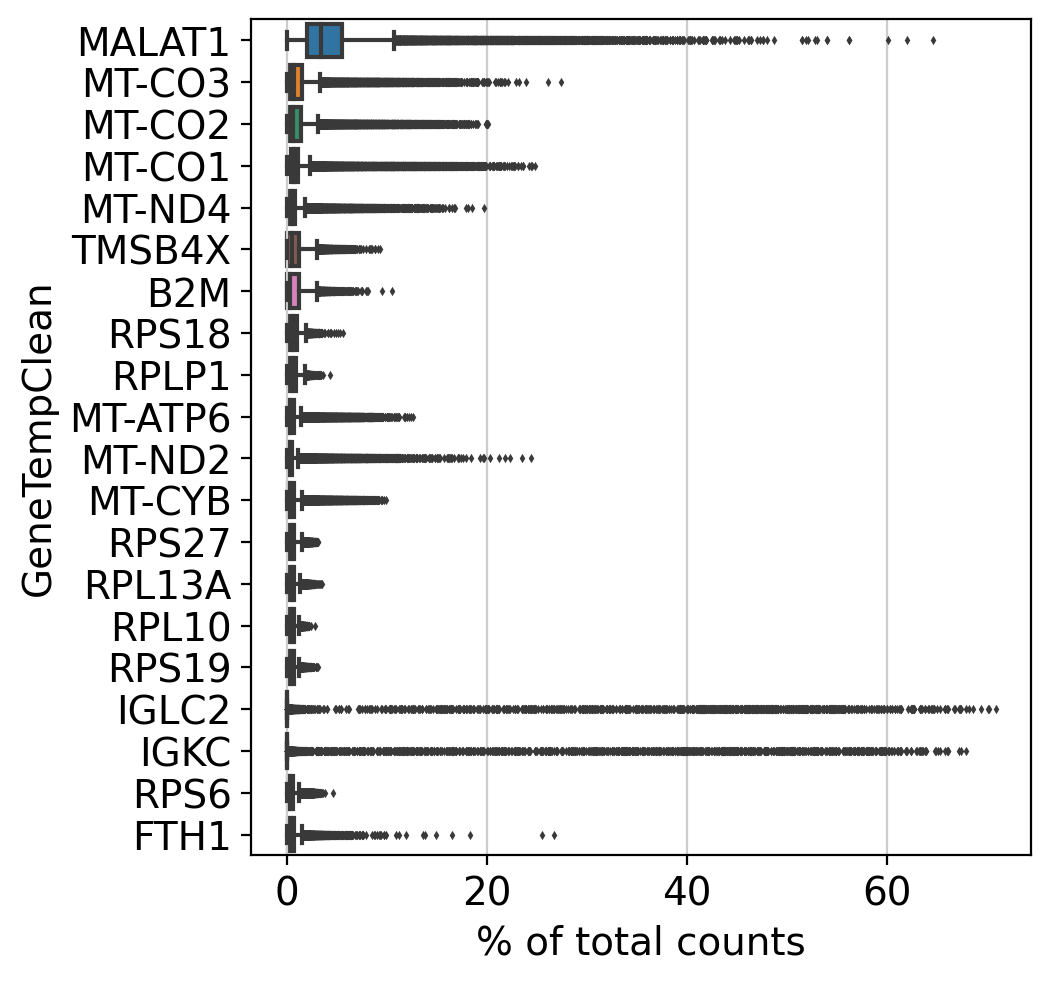

In [31]:
sc.pl.highest_expr_genes(adata, n_top=20)

# Mito/Ribo filtering

In [32]:
adata = adata[adata.obs['pct_counts_mt'] < 20, :]

# filter for percent ribo > 0.05
adata = adata[adata.obs['pct_counts_ribo'] > 5, :]
adata = adata[adata.obs['pct_counts_hb'] < 2, :]
print("Remaining cells %d"%adata.n_obs)

Remaining cells 61209


# Plot filtered QC

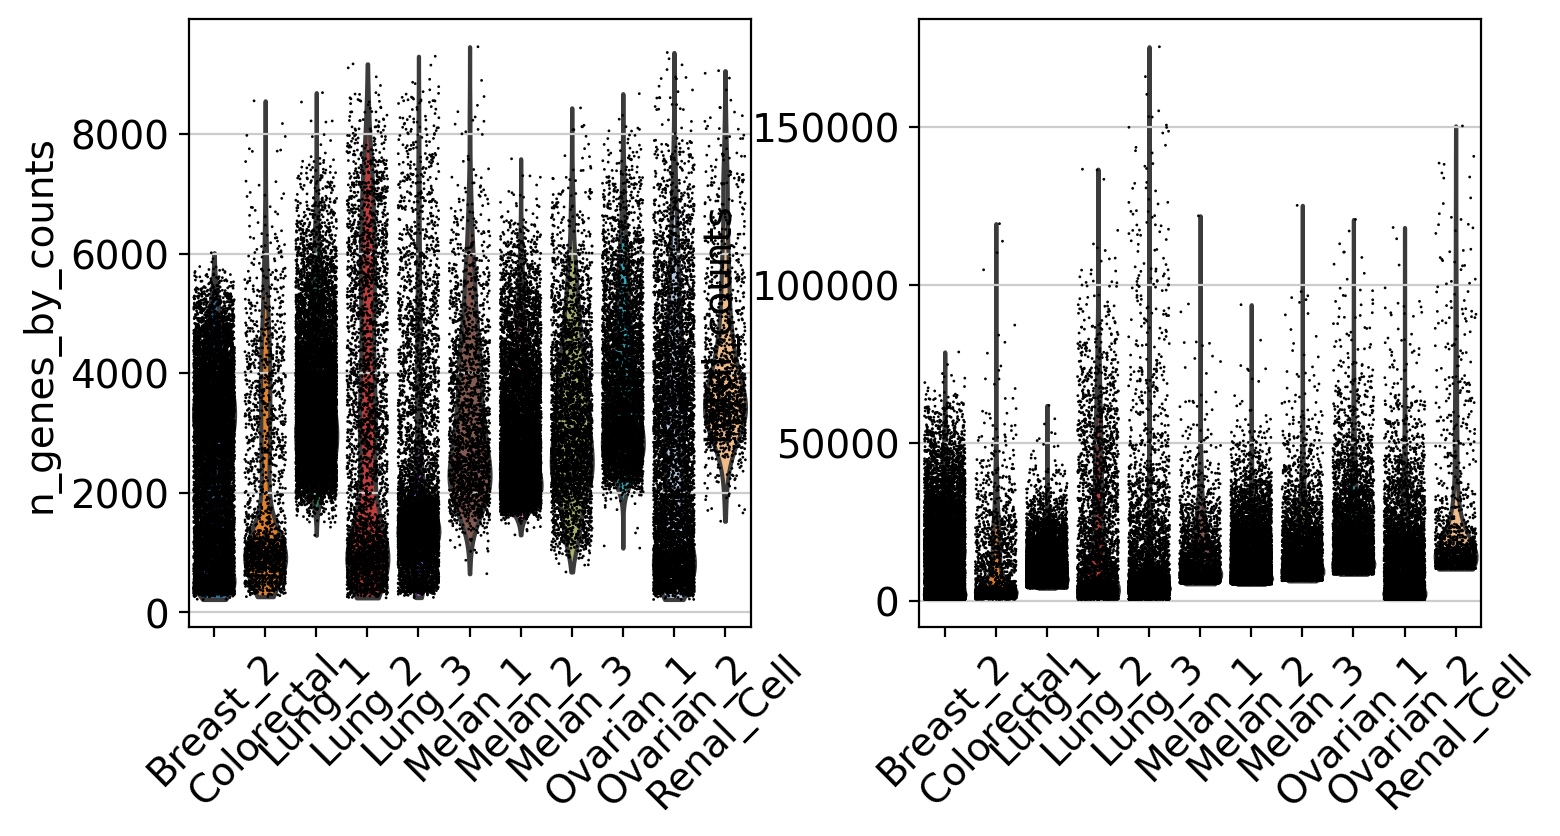

In [33]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

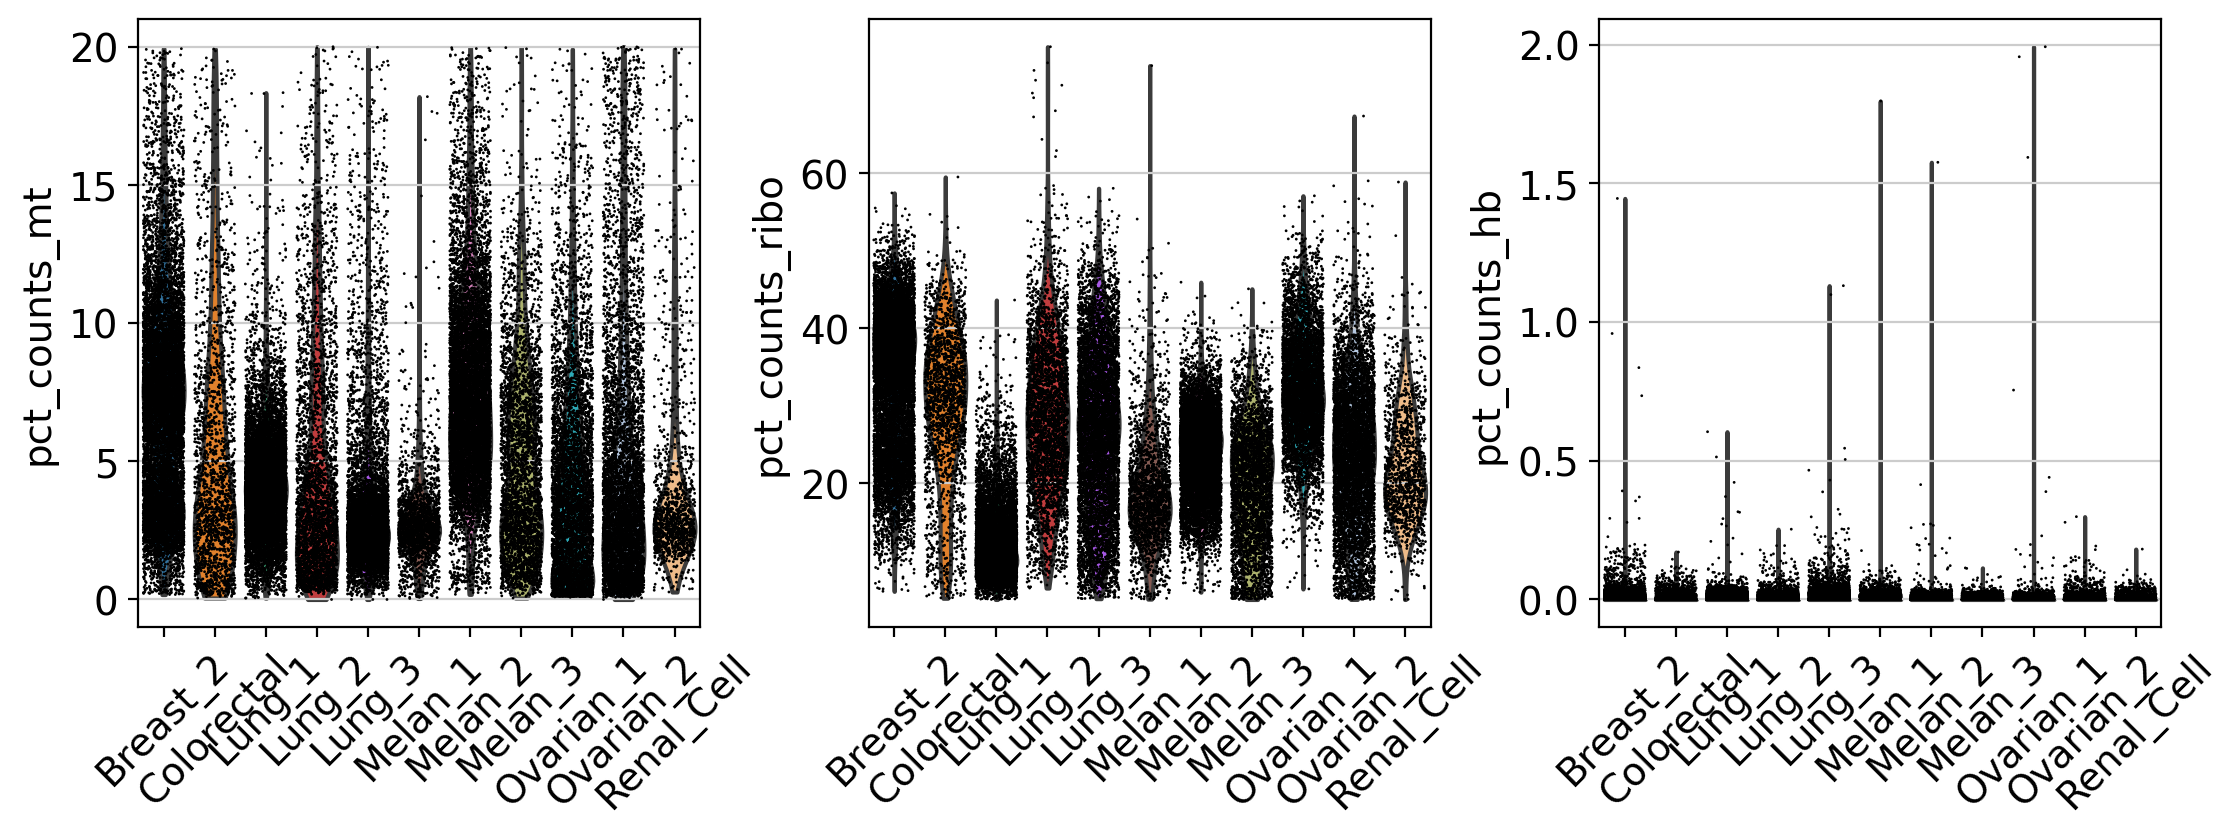

In [34]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

# Filter genes

In [35]:
mito_gene_names = sc.queries.mitochondrial_genes("hsapiens")

In [36]:
mito_gene_indicator = np.in1d(adata.var_names, mito_gene_names)

In [37]:
adata = adata[:, ~mito_gene_indicator]

In [38]:
print(adata.n_obs, adata.n_vars)
malat1 = adata.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
ribo_genes = adata.var_names.str.startswith(("RPL","RPS"))
hb_genes = adata.var_names.str.contains('^HB[^(P)]')

remove = np.add(ribo_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

61209 28010
61209 27896


# Calculate cell-cycle scores

In [39]:
cell_cycle_genes = [x.strip() for x in open('/home/lugli/spuccio/Projects/SP035_TregIntegration/Analysis/regev_lab_cell_cycle_genes_homo.txt')]
print(len(cell_cycle_genes))
# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
print(len(cell_cycle_genes))

90
89


In [40]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

... storing 'phase' as categorical


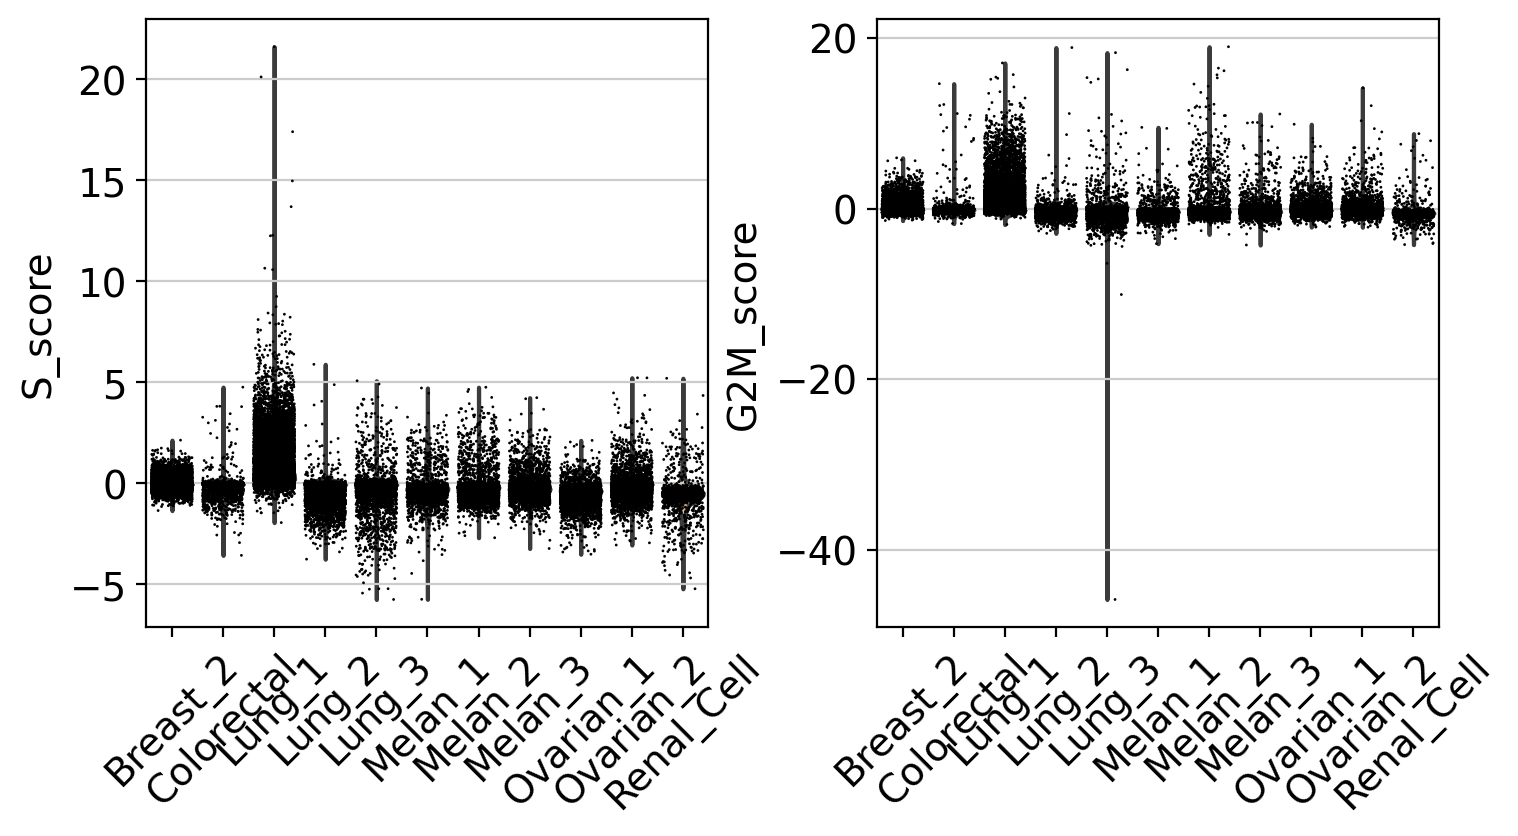

In [41]:
sc.pl.violin(adata, ['S_score', 'G2M_score'],
             jitter=0.4, groupby = 'SampleID', rotation=45)

# Predict doublets

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 31.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.5%
Elapsed time: 107.5 seconds


102

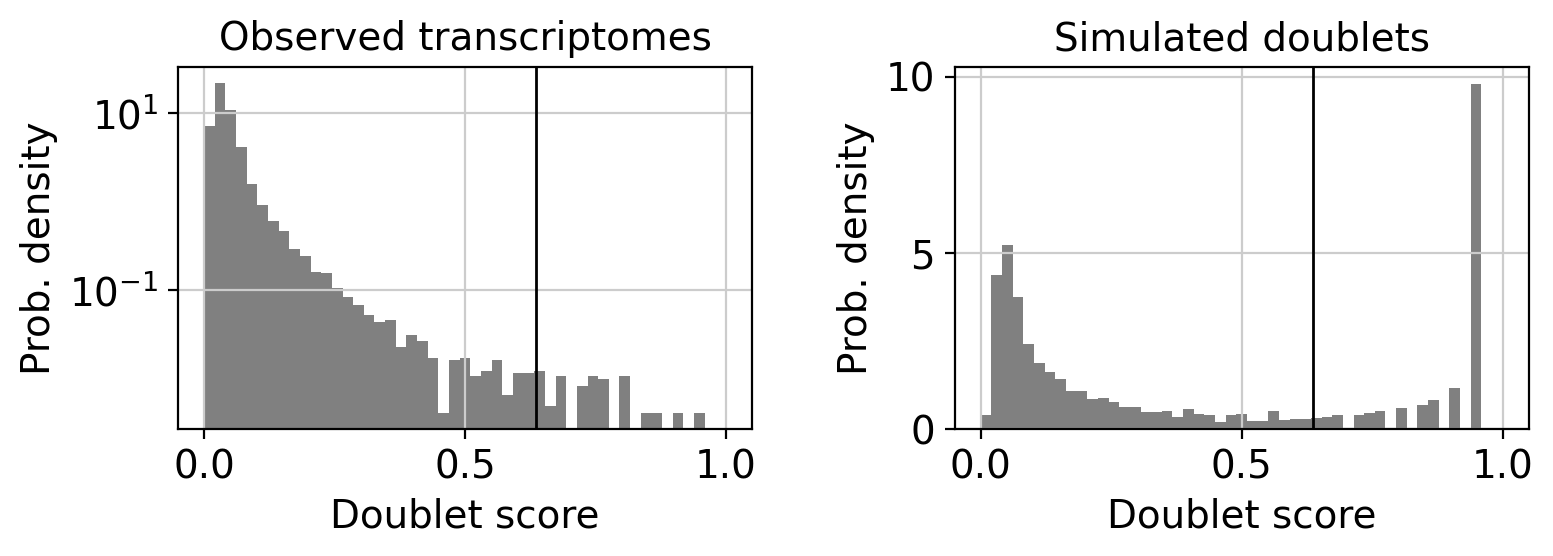

In [42]:
scrub = scr.Scrublet(adata.layers['raw'])
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [43]:
# add in column with singlet/doublet instead of True/False
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)

... storing 'doublet_info' as categorical


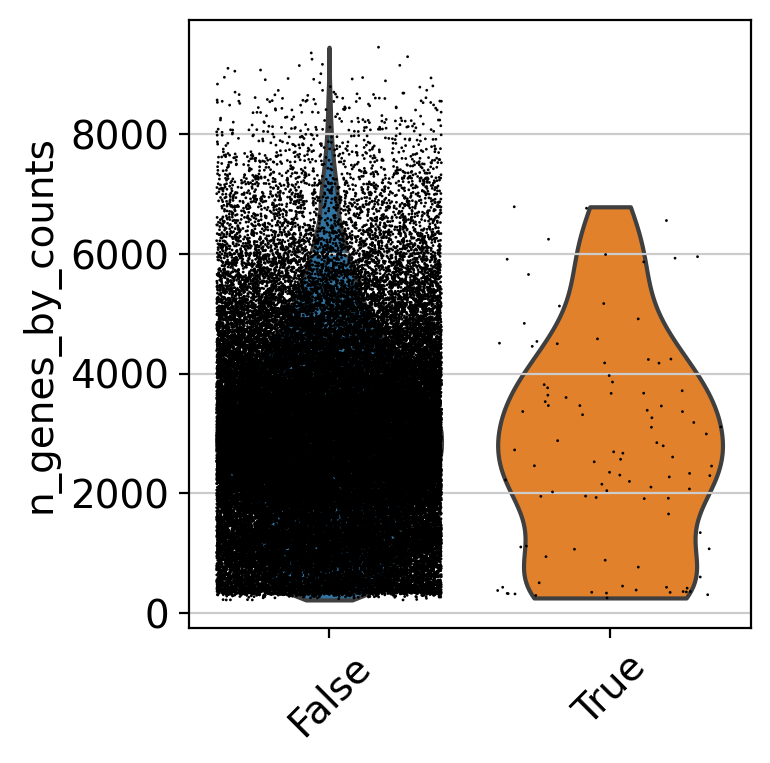

In [44]:
sc.pl.violin(adata, 'n_genes_by_counts',jitter=0.4, groupby = 'doublet_info', rotation=45)

In [45]:
adata = adata[adata.obs['doublet_info'] == "False",:]

# Processing 

In [46]:
#adata = adata[adata.obs.n_genes_by_counts < 3000, :]
# save normalized counts in raw slot.
adata.raw = adata
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata.layers['cpm'] = adata.X
# logaritmize
sc.pp.log1p(adata)
adata.layers['log1p'] = adata.X
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# Filter higly variable genes
#adata.raw = adata

# scale
#sc.pp.scale(adata)

# Celltypist classification

In [47]:
sc.tl.pca(adata,svd_solver='arpack',copy=False)

In [48]:
sc.pp.neighbors(adata,n_neighbors=10, n_pcs=40)

In [49]:
sce.pp.harmony_integrate(adata, ['SampleID'])

2022-06-13 22:27:32,322 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2022-06-13 22:27:47,216 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2022-06-13 22:28:02,198 - harmonypy - INFO - Converged after 2 iterations
Converged after 2 iterations


In [50]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_pca_harmony')

In [51]:
sc.tl.umap(adata)

In [52]:
adata.obsm['X_umap_harmony'] = adata.obsm['X_umap']

In [53]:
adata

AnnData object with n_obs × n_vars = 61107 × 27896
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'ENSGeneID', 'GeneTemp-7', 'GeneTempClean-7', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony'
    varm: 'PCs'
    layers: 'raw', 'cpm', 'log1p'
    obsp: 'distances', 'connectivities'

In [54]:
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 13
📂 Storing models in /home/lugli/spuccio/.celltypist/data/models
💾 Downloading model [1/13]: Immune_All_Low.pkl
💾 Downloading model [2/13]: Immune_All_High.pkl
💾 Downloading model [3/13]: Immune_All_PIP.pkl
💾 Downloading model [4/13]: Immune_All_AddPIP.pkl
💾 Downloading model [5/13]: COVID19_Immune_Landscape.pkl
💾 Downloading model [6/13]: Cells_Fetal_Lung.pkl
💾 Downloading model [7/13]: Cells_Intestinal_Tract.pkl
💾 Downloading model [8/13]: Cells_Lung_Airway.pkl
💾 Downloading model [9/13]: Developing_Mouse_Brain.pkl
💾 Downloading model [10/13]: Healthy_COVID19_PBMC.pkl
💾 Downloading model [11/13]: Human_Lung_Atlas.pkl
💾 Downloading model [12/13]: Nuclei_Lung_Airway.pkl
💾 Downloading model [13/13]: Pan_Fetal_Human.pkl


In [55]:
model = models.Model.load(model = 'Immune_All_High.pkl')

In [56]:
predictionsHigh = celltypist.annotate(adata, model = 'Immune_All_High.pkl', majority_voting = True)

🔬 Input data has 61107 cells and 27896 genes
🔗 Matching reference genes in the model
🧬 2726 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


In [57]:
adata.obs['CellCount']= adata.obs['CellCount'].astype(int)

In [58]:
adata.obs['Sample'].value_counts()

Patient37    10827
Patient39     9848
Patient45     9294
Patient41     6894
Patient36     6241
Patient43     5606
Patient38     3643
Patient40     3431
Patient46     2052
Patient44     1980
Patient42     1291
Name: Sample, dtype: int64

In [59]:
adata.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/Part1_F_ImportDataFromGliomaMetastasis.h5ad")

In [60]:
predictionsHigh.to_adata()

AnnData object with n_obs × n_vars = 61107 × 27896
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'ENSGeneID', 'GeneTemp-7', 'GeneTempClean-7', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony'
    varm: 'PCs

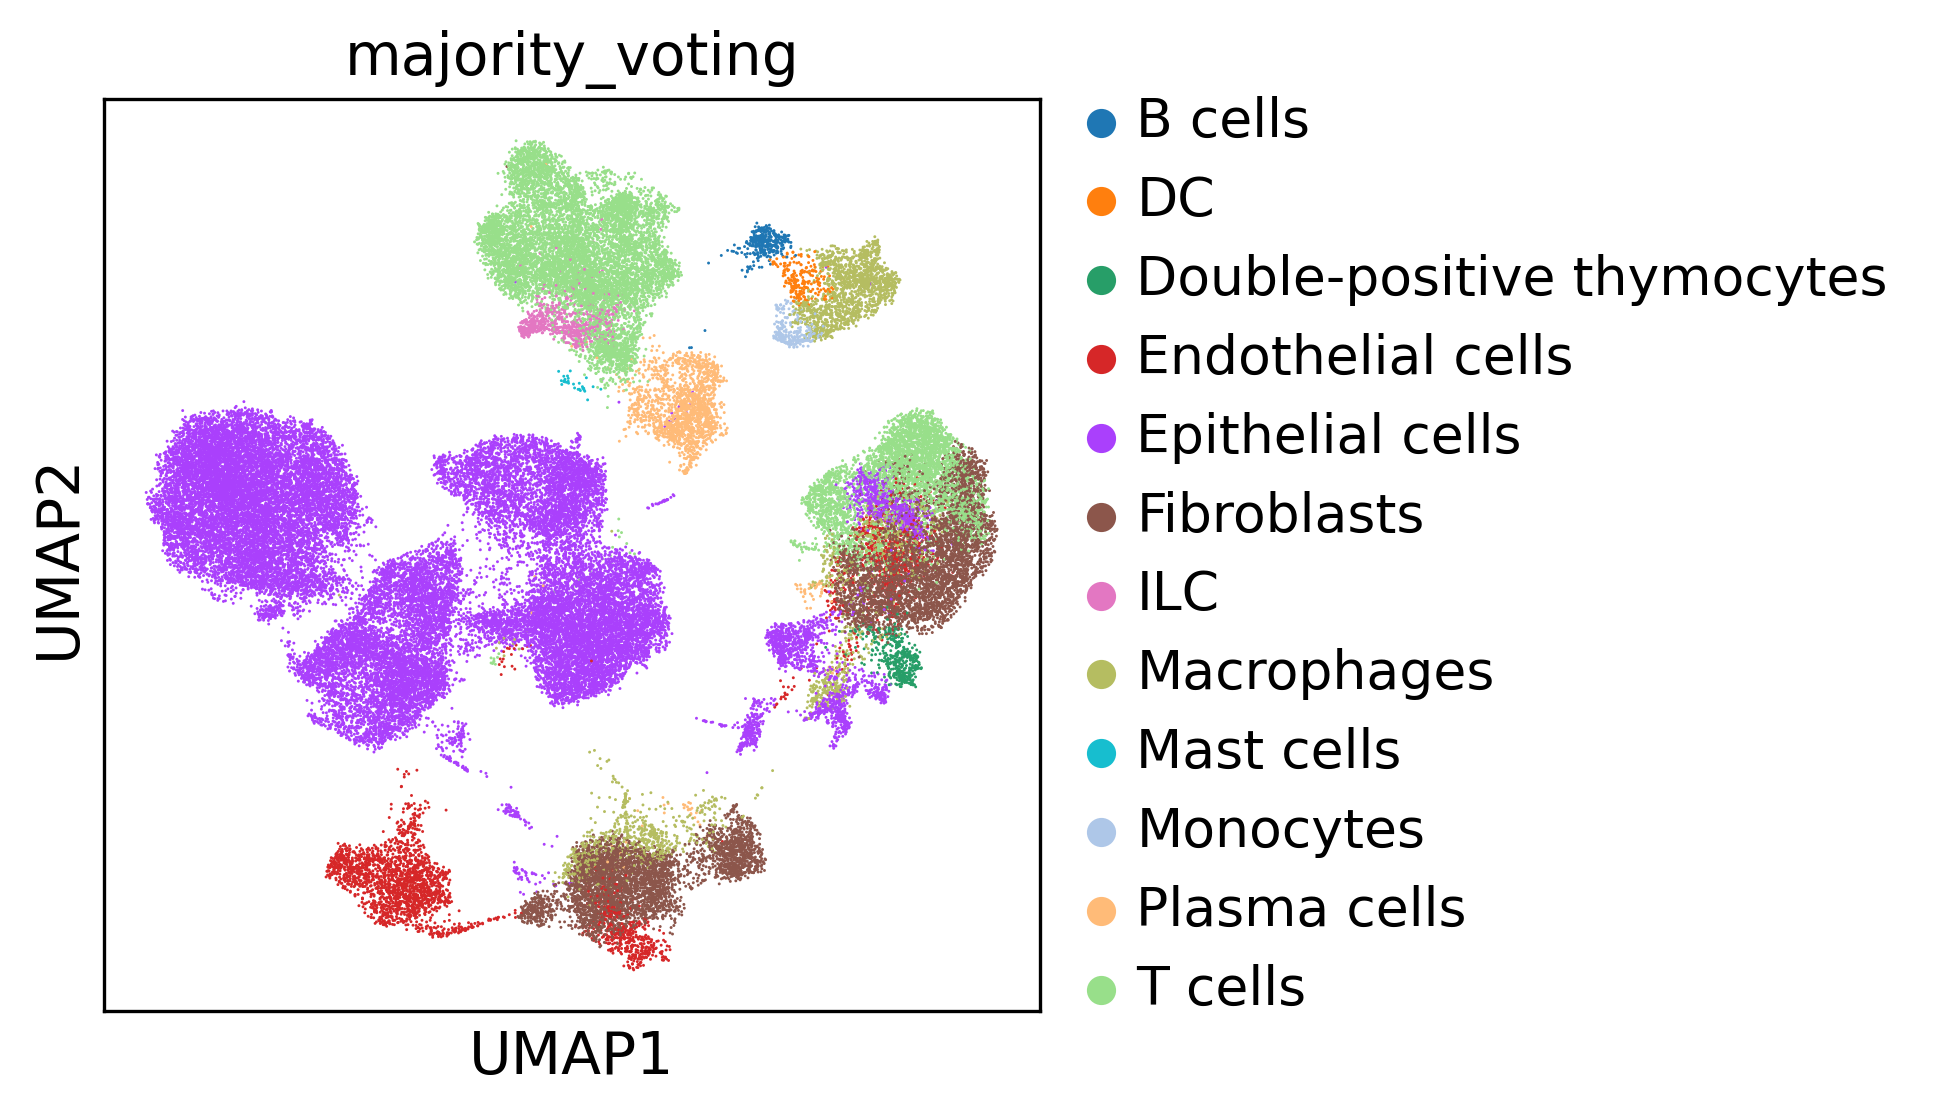

In [61]:
sc.set_figure_params(dpi=150)
sc.pl.umap(predictionsHigh.to_adata(), color='majority_voting')

# PanglaoDB classification

In [62]:
adata = adata[:, adata.var.highly_variable]

In [65]:
markers = dc.get_resource('PanglaoDB')
markers

label genesymbol canonical_marker         cell_type germ_layer human  \
0          CTRB1            False       Enterocytes   Endoderm  True   
1          CTRB1             True      Acinar cells   Endoderm  True   
2           KLK1             True      Acinar cells   Endoderm  True   
3           KLK1            False      Goblet cells   Endoderm  True   
4           KLK1            False  Epithelial cells   Mesoderm  True   
...          ...              ...               ...        ...   ...   
8472     SLC14A1             True  Urothelial cells   Mesoderm  True   
8473       UPK3A             True  Urothelial cells   Mesoderm  True   
8474       UPK1A             True  Urothelial cells   Mesoderm  True   
8475        UPK2             True  Urothelial cells   Mesoderm  True   
8476       UPK3B             True  Urothelial cells   Mesoderm  True   

label human_sensitivity human_specificity mouse mouse_sensitivity  \
0                   0.0        0.00439422  True        0.00331126   
1                   1.0       0.000628931  True          0.957143   
2              0.833333        0.00503145  True          0.314286   
3              0.588235        0.00503937  True          0.903226   
4                   0.0        0.00823306  True          0.225806   
...                 ...               ...   ...               ...   
8472                0.0         0.0181704  True               0.0   
8473                0.0               0.0  True               0.0   
8474                0.0               0.0  True               0.0   
8475                0.0               0.0  True               0.0   
8476                0.0               0.0  True               0.0   

label mouse_specificity ncbi_tax_id            organ ubiquitiousness  
0             0.0204803        9606         GI tract           0.017  
1             0.0159201        9606         Pancreas           0.017  
2             0.0128263        9606         Pancreas           0.013  
3             0.0124084        9606         GI tract           0.013  
4             0.0137585        9606       Epithelium           0.013  
...                 ...         ...              ...             ...  
8472                0.0        9606  Urinary bladder           0.008  
8473                0.0        9606  Urinary bladder             0.0  
8474                0.0        9606  Urinary bladder             0.0  
8475                0.0        9606  Urinary bladder             0.0  
8476                0.0        9606  Urinary bladder             0.0  

[8477 rows x 13 columns]

In [66]:
markers['organ'].value_counts()

Immune system         1775
Brain                 1589
GI tract               540
Kidney                 450
Reproductive           429
Connective tissue      413
Vasculature            372
Pancreas               365
Liver                  310
Epithelium             258
Blood                  247
Bone                   215
Lungs                  210
Skin                   172
Skeletal muscle        168
Olfactory system       136
Heart                  131
Smooth muscle          130
Eye                    122
Mammary gland           94
Zygote                  85
Embryo                  56
Placenta                28
Thymus                  27
Adrenal glands          25
Oral cavity             18
Thyroid                 14
Urinary bladder         11
Parathyroid glands      10
Name: organ, dtype: int64

In [67]:
# Filter by canonical_marker and human
markers = markers[(markers['human']=='True')&(markers['canonical_marker']=='True')]

# Remove duplicated entries
markers = markers[~markers.duplicated(['cell_type', 'genesymbol'])]
markers

label genesymbol canonical_marker                     cell_type germ_layer  \
1          CTRB1             True                  Acinar cells   Endoderm   
2           KLK1             True                  Acinar cells   Endoderm   
5           KLK1             True               Principal cells   Mesoderm   
7           KLK1             True  Plasmacytoid dendritic cells   Mesoderm   
8           KLK1             True             Endothelial cells   Mesoderm   
...          ...              ...                           ...        ...   
8472     SLC14A1             True              Urothelial cells   Mesoderm   
8473       UPK3A             True              Urothelial cells   Mesoderm   
8474       UPK1A             True              Urothelial cells   Mesoderm   
8475        UPK2             True              Urothelial cells   Mesoderm   
8476       UPK3B             True              Urothelial cells   Mesoderm   

label human human_sensitivity human_specificity mouse mouse_sensitivity  \
1      True               1.0       0.000628931  True          0.957143   
2      True          0.833333        0.00503145  True          0.314286   
5      True               0.0        0.00814536  True          0.285714   
7      True               0.0        0.00820189  True               1.0   
8      True               0.0        0.00841969  True               0.0   
...     ...               ...               ...   ...               ...   
8472   True               0.0         0.0181704  True               0.0   
8473   True               0.0               0.0  True               0.0   
8474   True               0.0               0.0  True               0.0   
8475   True               0.0               0.0  True               0.0   
8476   True               0.0               0.0  True               0.0   

label mouse_specificity ncbi_tax_id            organ ubiquitiousness  
1             0.0159201        9606         Pancreas           0.017  
2             0.0128263        9606         Pancreas           0.013  
5             0.0140583        9606           Kidney           0.013  
7             0.0129136        9606    Immune system           0.013  
8             0.0149153        9606      Vasculature           0.013  
...                 ...         ...              ...             ...  
8472                0.0        9606  Urinary bladder           0.008  
8473                0.0        9606  Urinary bladder             0.0  
8474                0.0        9606  Urinary bladder             0.0  
8475                0.0        9606  Urinary bladder             0.0  
8476                0.0        9606  Urinary bladder             0.0  

[5180 rows x 13 columns]

In [68]:
# Run leiden clustering algorithm
sc.tl.leiden(adata)

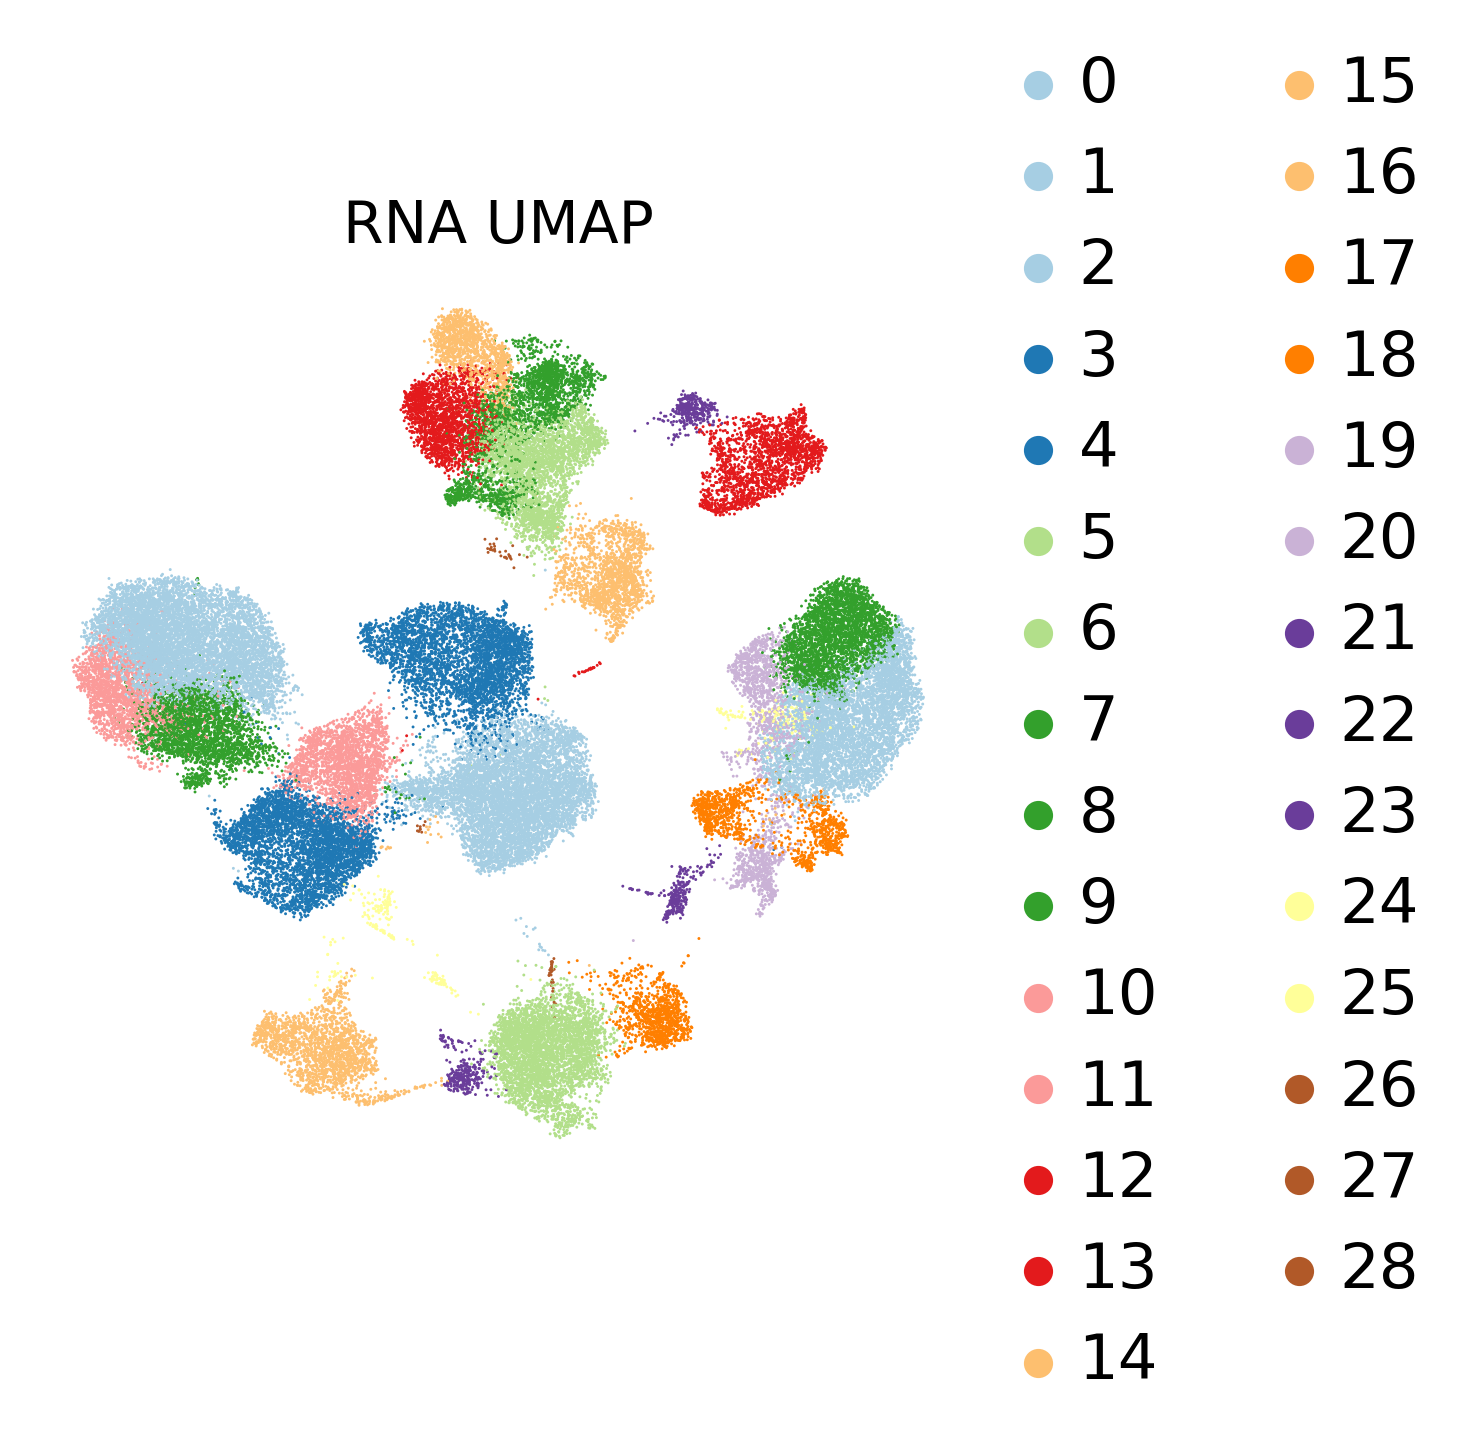

In [69]:
# Visualize
sc.pl.umap(adata, color='leiden', title='RNA UMAP',palette='Paired',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)

In [70]:
dc.run_ora(mat=adata, net=markers, source='cell_type', target='genesymbol', min_n=3, verbose=True,use_raw=False)

Running ora on mat with 61107 samples and 4287 targets for 121 sources.


100%|██████████| 61107/61107 [00:25<00:00, 2435.67it/s]


In [71]:
adata.obsm['ora_estimate']

source        Acinar cells  Adipocytes  Airway goblet cells  Alpha cells  \
Ovarian_2-0       1.600492    3.836906             2.775458     2.150470   
Ovarian_2-1       2.732583    1.852746            -0.000000     0.914812   
Ovarian_2-3       4.008986    2.792349            -0.000000     0.914812   
Ovarian_2-5      -0.000000    0.399411             1.202048    -0.000000   
Ovarian_2-7      -0.000000    0.399411             1.202048     0.914812   
...                    ...         ...                  ...          ...   
Melan_1-2223      4.008986    3.836906            -0.000000    -0.000000   
Melan_1-2224      2.732583    3.836906            -0.000000     0.914812   
Melan_1-2225      0.657170    1.852746            -0.000000    -0.000000   
Melan_1-2226      0.657170    1.041932            -0.000000     0.914812   
Melan_1-2227      0.657170    3.836906            -0.000000     2.150470   

source        Alveolar macrophages  Astrocytes   B cells  B cells memory  \
Ovarian_2-0               1.278916    2.625935  1.441283        0.454348   
Ovarian_2-1               1.278916   -0.000000  2.482598       -0.000000   
Ovarian_2-3              -0.000000   -0.000000  1.441283       -0.000000   
Ovarian_2-5               1.278916   -0.000000  9.393114        6.682852   
Ovarian_2-7               1.278916    0.625432  2.482598       -0.000000   
...                            ...         ...       ...             ...   
Melan_1-2223             -0.000000    0.625432  7.832489        4.177982   
Melan_1-2224             -0.000000    1.532564  1.441283       -0.000000   
Melan_1-2225              1.278916    1.532564  2.482598       -0.000000   
Melan_1-2226              2.948462    1.532564  4.958220        2.044139   
Melan_1-2227              1.278916    2.625935  4.958220        3.057317   

source        B cells naive  Basal cells  ...  Smooth muscle cells  \
Ovarian_2-0        2.105952    -0.000000  ...             1.074172   
Ovarian_2-1        2.105952    -0.000000  ...             1.903899   
Ovarian_2-3        1.201937    -0.000000  ...             1.903899   
Ovarian_2-5        4.287981    -0.000000  ...            -0.000000   
Ovarian_2-7        0.472273    -0.000000  ...             1.074172   
...                     ...          ...  ...                  ...   
Melan_1-2223       5.525559    -0.000000  ...             0.414002   
Melan_1-2224       0.472273    -0.000000  ...             3.928162   
Melan_1-2225      -0.000000     1.278916  ...            11.898514   
Melan_1-2226       8.236354    -0.000000  ...             0.414002   
Melan_1-2227       2.105952    -0.000000  ...             1.074172   

source        Stromal cells    T cells  T helper cells  T regulatory cells  \
Ovarian_2-0       -0.000000   0.421609       -0.000000           -0.000000   
Ovarian_2-1       -0.000000   1.090936       -0.000000           -0.000000   
Ovarian_2-3       -0.000000   0.421609       -0.000000           -0.000000   
Ovarian_2-5       -0.000000  23.842472        0.824744           -0.000000   
Ovarian_2-7       -0.000000   0.421609       -0.000000            0.950312   
...                     ...        ...             ...                 ...   
Melan_1-2223       1.496126   6.385777        1.958020            0.950312   
Melan_1-2224      -0.000000   1.930469       -0.000000           -0.000000   
Melan_1-2225       1.496126   5.141160        1.958020            3.721996   
Melan_1-2226      -0.000000   3.975529        3.295271           -0.000000   
Melan_1-2227      -0.000000   1.090936        0.824744            0.950312   

source        Tanycytes  Taste receptor cells  Thymocytes  Tuft cells  \
Ovarian_2-0    0.989412             -0.000000   -0.000000   -0.000000   
Ovarian_2-1    0.989412             -0.000000   -0.000000    1.032872   
Ovarian_2-3    2.310657             -0.000000   -0.000000    1.032872   
Ovarian_2-5   -0.000000             -0.000000   10.314783    2.404491   
Ovarian_2-7   -0.000000        

In [72]:
adata.obsm['ora_estimate'].columns

Index(['Acinar cells', 'Adipocytes', 'Airway goblet cells', 'Alpha cells',
       'Alveolar macrophages', 'Astrocytes', 'B cells', 'B cells memory',
       'B cells naive', 'Basal cells',
       ...
       'Smooth muscle cells', 'Stromal cells', 'T cells', 'T helper cells',
       'T regulatory cells', 'Tanycytes', 'Taste receptor cells', 'Thymocytes',
       'Tuft cells', 'Urothelial cells'],
      dtype='object', name='source', length=121)

In [73]:
acts = dc.get_acts(adata, obsm_key='ora_estimate')
acts

AnnData object with n_obs × n_vars = 61107 × 121
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'majority_voting_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony', 'ora_estimate', 'ora_pvals'

In [74]:
mean_enr = dc.summarize_acts(acts, groupby='leiden', min_std=1)
mean_enr

Adipocytes    B cells  B cells memory  B cells naive  Basophils  \
0     2.835801   2.094199        0.072917       0.624339   1.555311   
1     1.050127   1.252041        0.237831       0.277513   0.851065   
10    2.000626   1.204230        0.057150       0.208391   1.125428   
11    2.389777   2.642037        0.288735       1.461549   0.847177   
12    0.865083   5.063264        3.359805       4.417479   2.083222   
13    2.556194   4.087760        2.059076       3.357872   2.694154   
14    1.644089   1.385342        0.153269       0.776495   1.662505   
15    1.114024   7.741663        5.060724       5.326374   1.345104   
16    1.146170   5.809130        4.090892       4.486013   1.242839   
17    1.973419   0.516073        0.063796       0.779648   0.530541   
18    6.491150   0.999193        0.225858       0.806042   1.056493   
19    1.643286   0.430122        0.093158       0.741210   0.429564   
2     1.885049   0.751344        0.160434       1.002351   0.550038   
20    4.187773   3.100097        0.538452       2.289026   1.416317   
21    1.131330  12.296955       11.253912      14.022018   1.612000   
22    2.759313   0.750698        0.174792       0.532558   0.869091   
23    1.166772   1.158690        0.504036       0.563474   0.522309   
24    2.391530   3.399392        0.988125       2.832931   1.592301   
25    2.590097   1.245349        0.114900       0.325091   1.100157   
26    3.799411   2.649910        0.526959       1.811058   2.712418   
27    1.734604   3.139348        1.932970       4.347543   7.910738   
28    0.115770   0.869025        0.533064       0.815940   0.907580   
3     1.837958   1.314016        0.096743       0.254497   1.187170   
4     1.184716   1.215744        0.112192       0.129934   0.919764   
5     3.074320   1.009993        0.244195       0.684824   0.942310   
6     0.725759   4.511833        2.675428       3.155848   1.649273   
7     1.715952   0.406060        0.107050       0.742901   0.427008   
8     2.240729   2.679286        0.337627       1.412119   0.849452   
9     0.997454   5.191888        2.671759       3.189954   2.528346   

    Cholangiocytes  Dendritic cells  Ductal cells  Embryonic stem cells  \
0        10.087955         4.455145     11.005803              3.362010   
1         3.656686         1.275743      1.867428              3.598498   
10        8.253901         1.442228      6.597540              3.623479   
11        8.414345         7.277074      9.411562              3.401705   
12        0.778275         5.320576      0.686383              0.532727   
13        1.892876        23.963491      2.383804              1.123894   
14        1.518492         2.443747      1.444595              4.112269   
15        1.358407         6.815804      1.425763              1.329986   
16        0.741219         6.033225      0.634646              0.565484   
17        0.259549         2.340766      1.979159              1.969674   
18        1.000365         3.232926      2.618027              1.823619   
19        0.809848         1.763782      1.684683              1.651452   
2         0.383075         2.832180      1.651000              1.900044   
20        2.935324         7.534297      5.463113              2.178360   
21        1.077157        14.967049      1.054722              0.810280   
22        1.543155         2.425163      1.744438              3.311743   
23        3.315192         2.175825      2.458927              1.866500   
24        0.501280         7.939649      1.552330              1.577828   
25        7.610574         2.049925      6.902981              4.691889   
26        0.763538        18.635527      2.423264              2.139384   
27        0.644744         5.857436      0.579762              1.634826   
28        6.408213         2.981379      3.950387              3.015794   
3         8.264105         1.455018      6.840720              3.686467   
4         3.109453         1.083582      1.464817              3.814381  

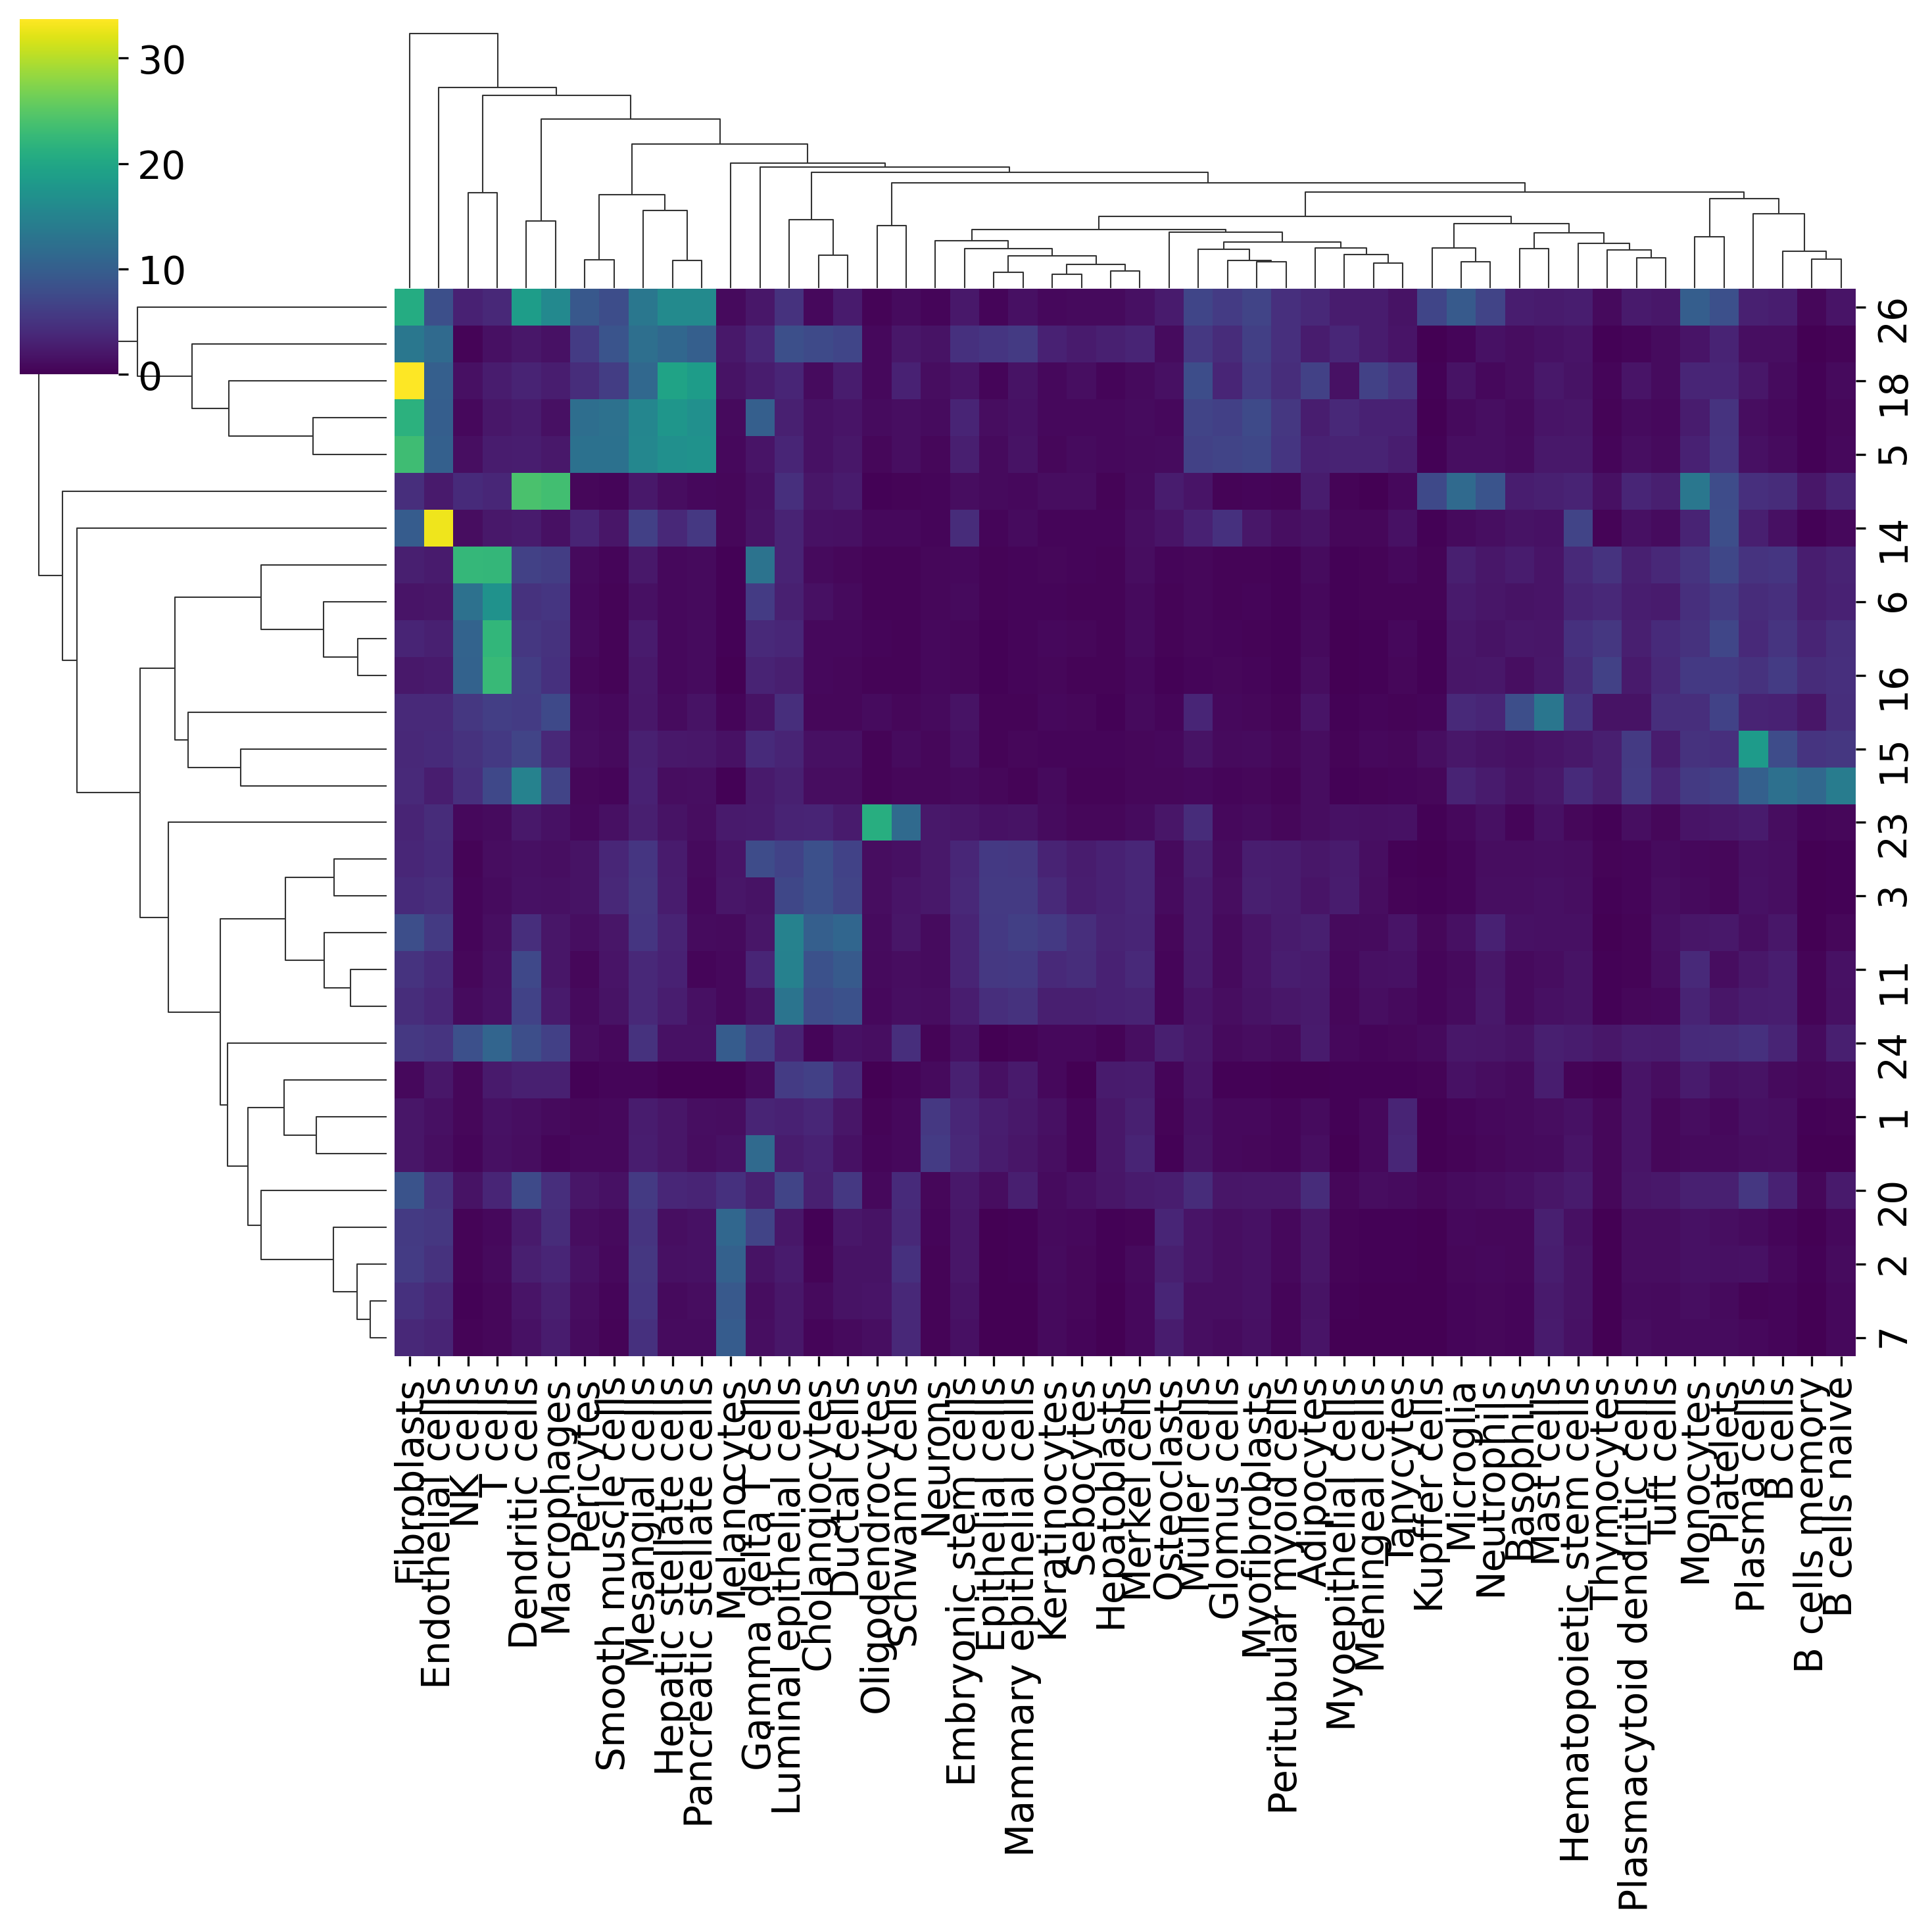

In [75]:
sns.clustermap(mean_enr, xticklabels=mean_enr.columns, cmap='viridis')
plt.show()

In [76]:
annotation_dict = dc.assign_groups(mean_enr)
annotation_dict

{'0': 'Luminal epithelial cells',
 '1': 'Neurons',
 '10': 'Cholangiocytes',
 '11': 'Luminal epithelial cells',
 '12': 'T cells',
 '13': 'Dendritic cells',
 '14': 'Endothelial cells',
 '15': 'Plasma cells',
 '16': 'T cells',
 '17': 'Melanocytes',
 '18': 'Fibroblasts',
 '19': 'Melanocytes',
 '2': 'Melanocytes',
 '20': 'Fibroblasts',
 '21': 'Dendritic cells',
 '22': 'Fibroblasts',
 '23': 'Oligodendrocytes',
 '24': 'T cells',
 '25': 'Fibroblasts',
 '26': 'Fibroblasts',
 '27': 'Mast cells',
 '28': 'Cholangiocytes',
 '3': 'Cholangiocytes',
 '4': 'Gamma delta T cells',
 '5': 'Fibroblasts',
 '6': 'T cells',
 '7': 'Melanocytes',
 '8': 'Luminal epithelial cells',
 '9': 'NK cells'}

... storing 'cell_type' as categorical


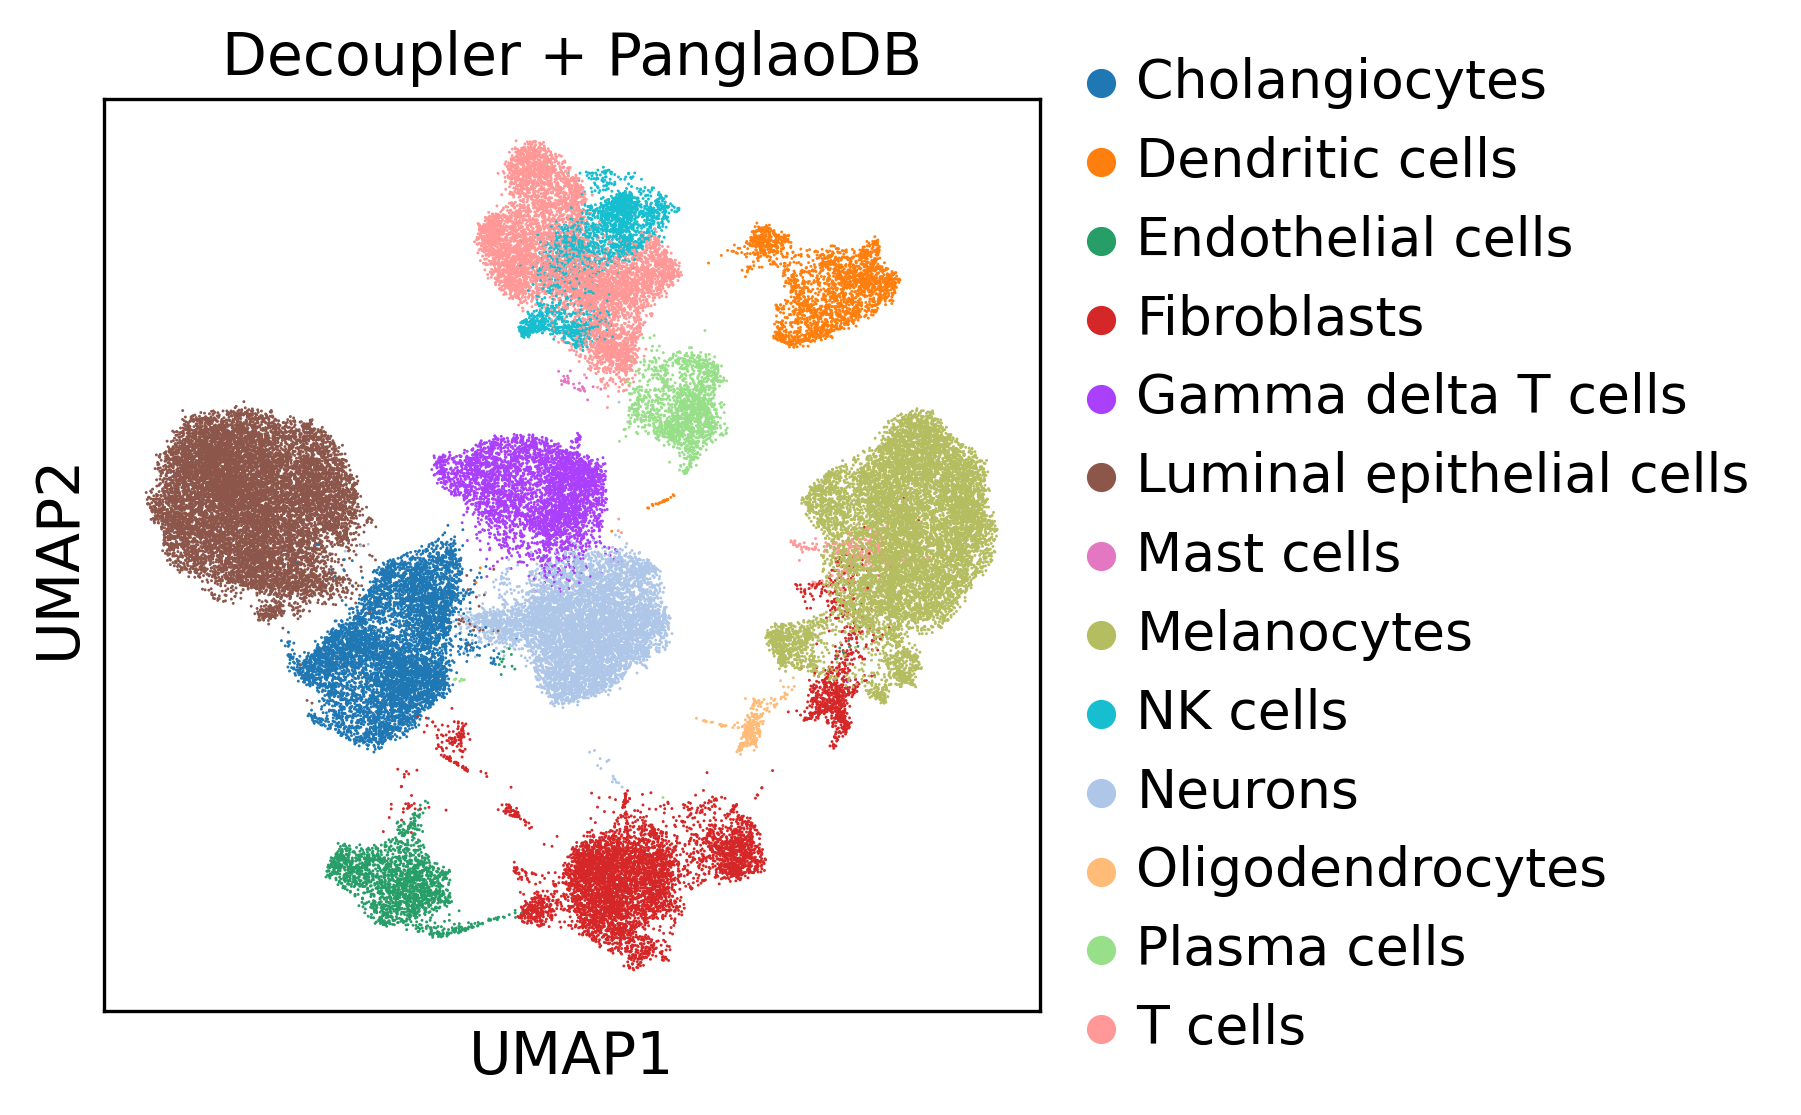

In [77]:
# Add cell type column based on annotation
adata.obs['cell_type'] = [annotation_dict[clust] for clust in adata.obs['leiden']]

# Visualize
sc.pl.umap(adata, color='cell_type',title='Decoupler + PanglaoDB')

In [78]:
adata

AnnData object with n_obs × n_vars = 61107 × 4287
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden', 'cell_type'
    var: 'ENSGeneID', 'GeneTemp-7', 'GeneTempClean-7', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'majority_voting_colors', 'leiden_colors', 'cell_type_

In [79]:
adata.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/Part1_F_ImportDataFromGliomaMetastasis.h5ad")